In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the data

In [6]:
excel_file = pd.ExcelFile('sales_data.xlsx')
sheet_names = excel_file.sheet_names
sheet_names

['Sales', 'Customers', 'Products']

In [7]:
excel_file = "sales_data.xlsx"
sales_df = pd.read_excel(excel_file, sheet_name="Sales")
customers_df = pd.read_excel(excel_file, sheet_name="Customers")
products_df = pd.read_excel(excel_file, sheet_name="Products")

In [8]:
sales_df.head()

,OrderID,CustomerID,Product,Quantity,Price,OrderDate,Region,TotalRevenue
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55


In [9]:
customers_df.head()

,CustomerID,CustomerName,Region
0,1,Customer_1,West
1,2,Customer_2,South
2,3,Customer_3,West
3,4,Customer_4,East
4,5,Customer_5,West


In [10]:
products_df.head()

,Product,Price
0,Laptop,1500
1,Tablet,500
2,Smartphone,1200
3,Monitor,300
4,Keyboard,50


In [11]:
sales_df.info(),sales_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       10000 non-null  int64         
 1   CustomerID    10000 non-null  int64         
 2   Product       10000 non-null  object        
 3   Quantity      10000 non-null  int64         
 4   Price         10000 non-null  float64       
 5   OrderDate     10000 non-null  datetime64[ns]
 6   Region        10000 non-null  object        
 7   TotalRevenue  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 625.1+ KB


(None, (10000, 8))

In [12]:
customers_df.info(),customers_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    999 non-null    int64 
 1   CustomerName  999 non-null    object
 2   Region        999 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.5+ KB


(None, (999, 3))

In [13]:
products_df.info(),products_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  5 non-null      object
 1   Price    5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


(None, (5, 2))

In [14]:
# Advance Excel operations
merge_sales_on_customers = pd.merge(sales_df,customers_df,on='CustomerID', how = 'left')
merge_sales_on_customers

,OrderID,CustomerID,Product,Quantity,Price,OrderDate,Region_x,TotalRevenue,CustomerName,Region_y
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80,Customer_413,South
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16,Customer_500,North
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75,Customer_925,South
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58,Customer_55,South
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55,Customer_502,West
...,...,...,...,...,...,...,...,...,...,...
9995,9996,268,Keyboard,2,675.83,2050-05-14,South,1351.66,Customer_268,West
9996,9997,562,Smartphone,1,1596.17,2050-05-15,West,1596.17,Customer_562,North
9997,9998,282,Monitor,9,130.39,2050-05-16,East,1173.51,Customer_282,West
9998,9999,435,Laptop,6,831.26,2050-05-17,West,4987.56,Customer_435,South


In [15]:
merge_sales_on_product = pd.merge(sales_df, products_df[['Product','Price']], on = 'Product', how = 'left')
merge_sales_on_product

,OrderID,CustomerID,Product,Quantity,Price_x,OrderDate,Region,TotalRevenue,Price_y
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80,50
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16,1200
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75,1200
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58,300
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55,1200
...,...,...,...,...,...,...,...,...,...
9995,9996,268,Keyboard,2,675.83,2050-05-14,South,1351.66,50
9996,9997,562,Smartphone,1,1596.17,2050-05-15,West,1596.17,1200
9997,9998,282,Monitor,9,130.39,2050-05-16,East,1173.51,300
9998,9999,435,Laptop,6,831.26,2050-05-17,West,4987.56,1500


In [16]:
total_sales = sum(merge_sales_on_product['Price_x']*merge_sales_on_product['Quantity'])

In [17]:
# Pivot Plots
pd.pivot_table(merge_sales_on_product , values = 'TotalRevenue', index = 'Product', columns = 'Region' , aggfunc= 'sum')


Region,East,North,South,West
Product,,,,
Keyboard,2496402.98,2621697.05,2695977.84,2786048.14
Laptop,2325639.45,2652925.56,2626530.41,2570569.77
Monitor,2650384.26,2241453.22,2652228.88,2888205.42
Smartphone,2561689.35,2472203.75,2726864.73,2673185.67
Tablet,2503484.71,3010931.54,2769039.61,2591883.76


<Axes: xlabel='Product', ylabel='Price_x'>

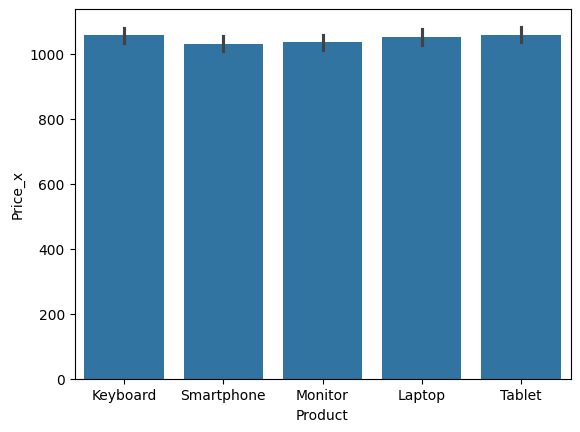

In [18]:
sns.barplot(x = 'Product', y = 'Price_x', data = merge_sales_on_product)

<Axes: xlabel='Region', ylabel='TotalRevenue'>

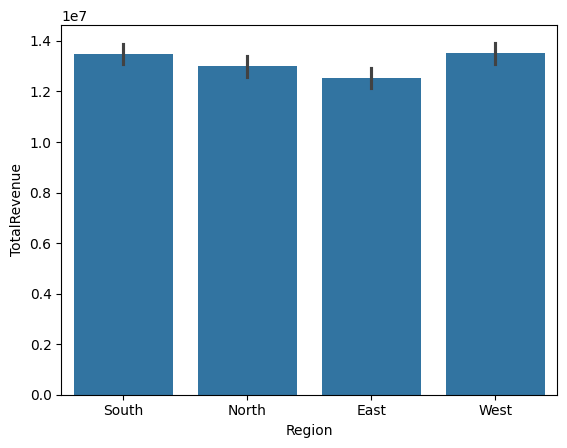

In [20]:
sns.barplot(x='Region', y='TotalRevenue', data=merge_sales_on_product, estimator=sum)

<Axes: xlabel='Product', ylabel='Quantity'>

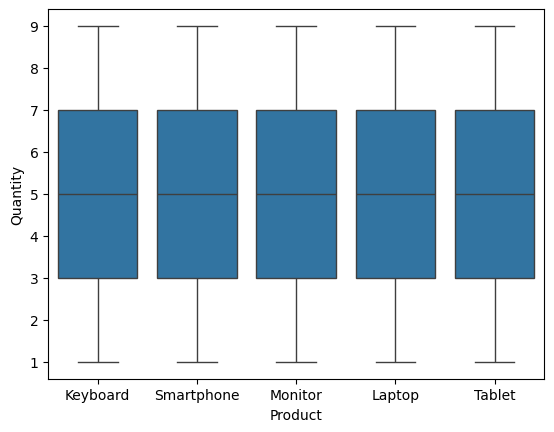

In [21]:
sns.boxplot(x='Product', y='Quantity', data=merge_sales_on_product)

In [ ]:
plt.scatter()